# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [153]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

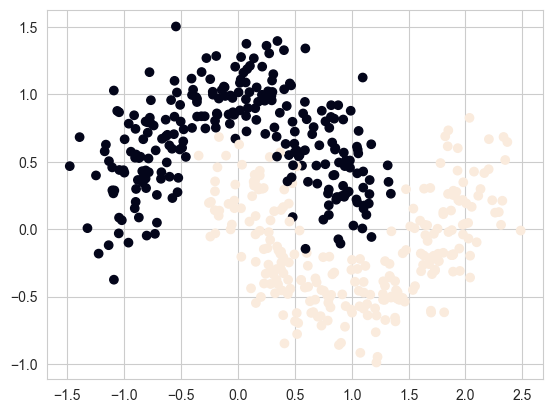

In [154]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [155]:
X, y = moons_points, moons_labels

In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2', tol=1e-5, C=2, solver='newton-cholesky')
svm = SVC(kernel='linear', C=2, tol=1e-5)

# Training a classifiers
lr.fit(X, y)
svm.fit(X, y)

SVC(C=2, kernel='linear', tol=1e-05)

accuracy svm:0.862


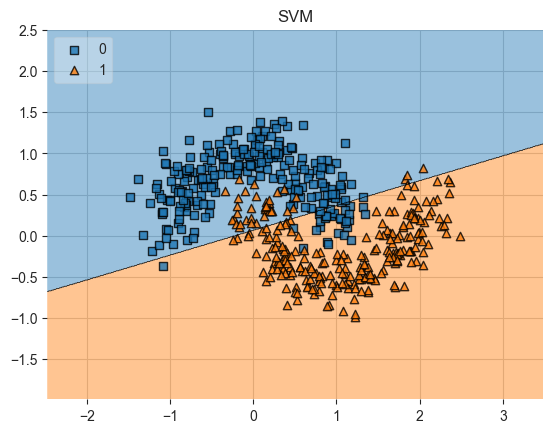

In [157]:
# Plot SVC decision regions
plot_decision_regions(X, y, clf=svm, legend=2)

# Calculate metric
svm_y_pred = svm.predict(X)
svm_acc = accuracy_score(y, svm_y_pred)
print(f'accuracy svm:{svm_acc}')

# Adding axes annotations
plt.title('SVM')
plt.show()

accuracy logreg:0.86


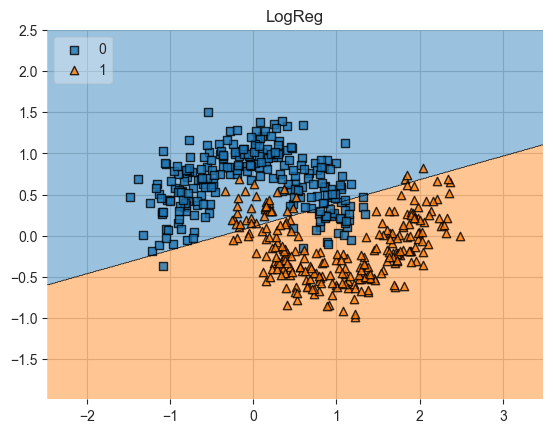

In [158]:
# Plot SVC decision regions
plot_decision_regions(X, y, clf=lr, legend=2)

# Calculate metric
lr_y_pred = lr.predict(X)
lr_acc = accuracy_score(y, lr_y_pred)
print(f'accuracy logreg:{lr_acc}')

# Adding axes annotations
plt.title('LogReg')
plt.show()

Obiviously, that Logictic Regression and SVM classifiers with linear kernels can only separates linear dependent objects. Because inside the algorithms simply dot product *<x, $\omega$>* is performed (linear combination of features and parameters). 

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

In [159]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10], 
             'kernel': ('poly', 'rbf', 'sigmoid'),
             'degree': [2, 3, 4, 5],
             'gamma': ('scale', 'auto')}
svm = SVC()
clf = GridSearchCV(svm, param_grid, verbose=4, scoring='accuracy')
clf.fit(X, y)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.680 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.620 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.680 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.630 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.640 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.930 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, sco

[CV 3/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.960 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.670 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.700 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.800 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.720 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.710 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.760 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.720 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.720 total time=   0.0s
[CV 4/5] END C=0.1, deg

[CV 2/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.630 total time=   0.0s
[CV 3/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.750 total time=   0.0s
[CV 4/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.610 total time=   0.0s
[CV 5/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.670 total time=   0.0s
[CV 1/5] END C=1, degree=5, gamma=auto, kernel=poly;, score=0.820 total time=   0.0s
[CV 2/5] END C=1, degree=5, gamma=auto, kernel=poly;, score=0.760 total time=   0.0s
[CV 3/5] END C=1, degree=5, gamma=auto, kernel=poly;, score=0.770 total time=   0.0s
[CV 4/5] END C=1, degree=5, gamma=auto, kernel=poly;, score=0.800 total time=   0.0s
[CV 5/5] END C=1, degree=5, gamma=auto, kernel=poly;, score=0.750 total time=   0.0s
[CV 1/5] END C=1, degree=5, gamma=auto, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END C=1, degree=5, gamma=auto, kernel=rbf;, score=0.970 total time=   0.0s
[CV 3/5] END C=1, degree=5, gamma=auto, kernel=rbf;

[CV 5/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.900 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.990 total time=   0.0s
[CV 2/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.960 total time=   0.0s
[CV 3/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.980 total time=   0.0s
[CV 4/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/5] END C=10, degree=5, gamma=scale, kernel=rbf;, score=0.970 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=sigmoid;, score=0.570 total time=   0.0s
[CV 2/5] END C=10, degree=5, gamma=scale, kernel=sigmoid;, score=0.610 total time=   0.0s
[CV 3/5] END C=10, degree=5, gamma=scale, kernel=sigmoid;, score=0.740 total time=   0.0s
[CV 4/5] END C=10, degree=5, gamma=scale, kernel=sigmoid;, score=0.600 total time=   0.0s
[CV 5/5] END C=10, degree=5, gamma=scale, kernel=sigmoid;, score=0.670 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('poly', 'rbf', 'sigmoid')},
             scoring='accuracy', verbose=4)

In [160]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.976


accuracy: 0.976


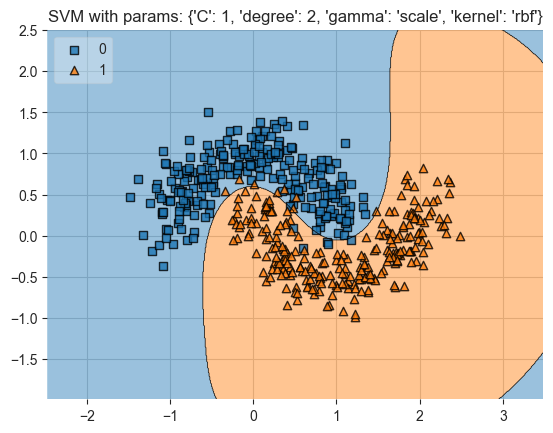

In [161]:
# Plot SVC decision regions
plot_decision_regions(X, y, clf=clf, legend=2)

# Calculate metric
svm_kernel_y_pred = clf.predict(X)
print(f'accuracy: {clf.best_score_}')

# Adding axes annotations
plt.title(f'SVM with params: {clf.best_params_}')
plt.show()

The classification quality is significantly increased (from 0.862 to 0.976). It happened, because now we used non-linear kernels in SVM, which can transform the space in that manner, that in transformed space our objects will be linearly separable.  
So, the best option is Radial Basis function as kernel with 2 degree. 

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Compare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [162]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(degree=3, include_bias=False)

X_pf = pf.fit_transform(X, y)

In [163]:
X_pf.shape, X.shape

((500, 9), (500, 2))

In [164]:
lr = LogisticRegression(penalty='l2', tol=1e-5, C=2, solver='newton-cholesky')
lr.fit(X_pf, y)

LogisticRegression(C=2, solver='newton-cholesky', tol=1e-05)

In [165]:
# Calculate metric
lr_pf_y_pred = lr.predict(X_pf)
lr_pf_acc = accuracy_score(y, lr_pf_y_pred)
print(f'accuracy logreg:{lr_pf_acc}')

accuracy logreg:0.97


Results on Logistic Regression with polynomial features generated with degree=3 is quite similar to the SVM classifier with RBF kernel 2-nd degree.  

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

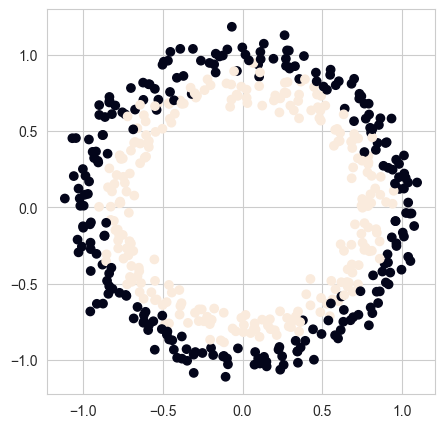

In [166]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

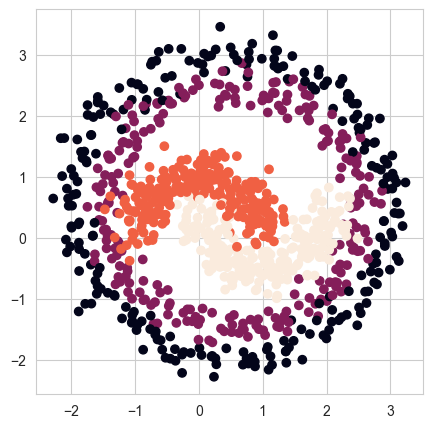

In [167]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

#### 1 problem: circle in cirle

Try the LR and SVM classifiers

In [168]:
param_grid = {'C': [0.1, 1, 10], 
             'kernel': ('poly', 'rbf', 'sigmoid'),
             'degree': [2, 3, 4, 5],
             'gamma': ('scale', 'auto')}
svm = SVC(tol=1e-5)
clf = GridSearchCV(svm, param_grid, verbose=4, scoring='accuracy')
clf.fit(circles_points, circles_labels)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.980 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.930 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.920 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.940 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.890 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.790 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.880 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, sco

[CV 3/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.820 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.780 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.430 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.490 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.400 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.460 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.470 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.620 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.510 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.550 total time=   0.0s
[CV 4/5] END C=0.1, deg

[CV 1/5] END C=1, degree=5, gamma=scale, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END C=1, degree=5, gamma=scale, kernel=rbf;, score=0.930 total time=   0.0s
[CV 3/5] END C=1, degree=5, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 4/5] END C=1, degree=5, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END C=1, degree=5, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.440 total time=   0.0s
[CV 2/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.590 total time=   0.0s
[CV 3/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.510 total time=   0.0s
[CV 4/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.530 total time=   0.0s
[CV 5/5] END C=1, degree=5, gamma=scale, kernel=sigmoid;, score=0.540 total time=   0.0s
[CV 1/5] END C=1, degree=5, gamma=auto, kernel=poly;, score=0.620 total time=   0.0s
[CV 2/5] END C=1, degree=5, gamma=auto, kerne

[CV 5/5] END C=10, degree=4, gamma=auto, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=auto, kernel=sigmoid;, score=0.440 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=auto, kernel=sigmoid;, score=0.580 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=auto, kernel=sigmoid;, score=0.490 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=auto, kernel=sigmoid;, score=0.550 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=auto, kernel=sigmoid;, score=0.540 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.590 total time=   0.0s
[CV 2/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.560 total time=   0.0s
[CV 3/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.610 total time=   0.0s
[CV 4/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.610 total time=   0.0s
[CV 5/5] END C=10, degree=5, gamma=scale, kernel=poly;, score=0.610 total time=   0.0s
[CV 1/5] END C=10, degree=5, gamma=

GridSearchCV(estimator=SVC(tol=1e-05),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('poly', 'rbf', 'sigmoid')},
             scoring='accuracy', verbose=4)

In [169]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly'}
0.942


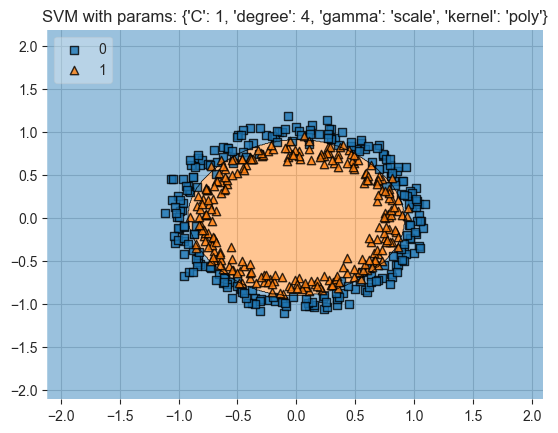

In [170]:
plot_decision_regions(circles_points, circles_labels, clf=clf, legend=2)
plt.title(f'SVM with params: {clf.best_params_}')
plt.show()

In [171]:
lr = LogisticRegression(penalty='l2', tol=1e-5, C=2, solver='newton-cholesky')

In [172]:
pf = PolynomialFeatures(degree=5, include_bias=False)
X_pf = pf.fit_transform(circles_points, circles_labels)

In [173]:
lr.fit(X_pf, circles_labels)

LogisticRegression(C=2, solver='newton-cholesky', tol=1e-05)

In [174]:
y_pred = lr.predict(X_pf)
print(f'accuracy logreg:{accuracy_score(circles_labels, y_pred)}')

accuracy logreg:0.934


Let's try the random forest classifier and kNN classifier

In [145]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [146]:
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 
             'weights': ('uniform', 'distance'),
             'p': [1, 2, 3, 4, 5]}
clf = GridSearchCV(knn, param_grid, verbose=4, scoring='accuracy')
clf.fit(circles_points, circles_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END n_neighbors=2, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=uniform;, score=0.870 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=uniform;, score=0.880 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=uniform;, score=0.860 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=uniform;, score=0.830 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=1, weights=distance;, score=0.940 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=distance;, score=0.890 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=distance;, score=0.850 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=2, weights=uniform;, score=0.920 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=

[CV 1/5] END n_neighbors=4, p=2, weights=distance;, score=0.950 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=2, weights=distance;, score=0.890 total time=   0.0s
[CV 3/5] END n_neighbors=4, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=3, weights=uniform;, score=0.960 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=3, weights=uniform;, score=0.920 total time=   0.0s
[CV 3/5] END n_neighbors=4, p=3, weights=uniform;, score=0.910 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=3, weights=uniform;, score=0.890 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=3, weights=uniform;, score=0.890 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=3, weights=distance;, score=0.960 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=3, weights=distance;, score=0.890 total time=   0.0s
[CV 3/5] 

[CV 2/5] END n_neighbors=6, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=2, weights=distance;, score=0.900 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=2, weights=distance;, score=0.910 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=3, weights=uniform;, score=0.970 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=3, weights=uniform;, score=0.930 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=3, weights=uniform;, score=0.910 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=3, weights=uniform;, score=0.890 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=3, weights=uniform;, score=0.880 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=3, weights=distance;, score=0.970 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=3, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=3, weights=distance;, score=0.920 total time=   0.0s
[CV 4/5] 

[CV 5/5] END n_neighbors=8, p=3, weights=uniform;, score=0.870 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=3, weights=distance;, score=0.970 total time=   0.0s
[CV 2/5] END n_neighbors=8, p=3, weights=distance;, score=0.920 total time=   0.0s
[CV 3/5] END n_neighbors=8, p=3, weights=distance;, score=0.920 total time=   0.0s
[CV 4/5] END n_neighbors=8, p=3, weights=distance;, score=0.910 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=3, weights=distance;, score=0.910 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=4, weights=uniform;, score=0.950 total time=   0.0s
[CV 2/5] END n_neighbors=8, p=4, weights=uniform;, score=0.920 total time=   0.0s
[CV 3/5] END n_neighbors=8, p=4, weights=uniform;, score=0.910 total time=   0.0s
[CV 4/5] END n_neighbors=8, p=4, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END n_neighbors=8, p=4, weights=uniform;, score=0.860 total time=   0.0s
[CV 1/5] END n_neighbors=8, p=4, weights=distance;, score=0.970 total time=   0.0s
[CV 2/5] E

[CV 1/5] END n_neighbors=15, p=3, weights=uniform;, score=0.920 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=3, weights=uniform;, score=0.920 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=3, weights=uniform;, score=0.880 total time=   0.0s
[CV 4/5] END n_neighbors=15, p=3, weights=uniform;, score=0.920 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=3, weights=uniform;, score=0.890 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=3, weights=distance;, score=0.960 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=3, weights=distance;, score=0.920 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=3, weights=distance;, score=0.910 total time=   0.0s
[CV 4/5] END n_neighbors=15, p=3, weights=distance;, score=0.920 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=3, weights=distance;, score=0.910 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=4, weights=uniform;, score=0.930 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=4, weights=uniform;, score=0.910 total time=   0.0s

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [148]:
print(clf.best_params_)
print(clf.best_score_)

{'n_neighbors': 7, 'p': 5, 'weights': 'distance'}
0.932


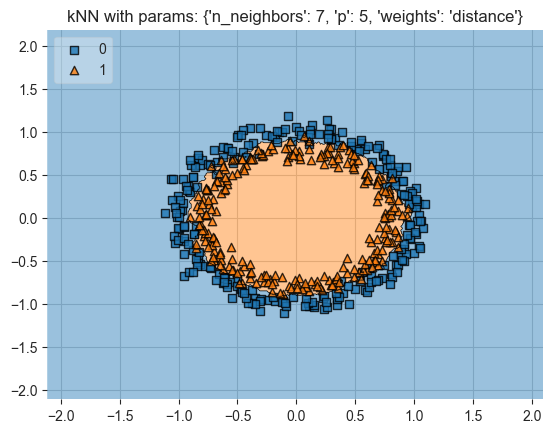

In [149]:
plot_decision_regions(circles_points, circles_labels, clf=clf, legend=2)
plt.title(f'kNN with params: {clf.best_params_}')
plt.show()

In [175]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(circles_points, circles_labels)

RandomForestClassifier()

In [176]:
y_pred = clf.predict(circles_points)
print(f'accuracy: {accuracy_score(circles_labels, y_pred)}')

accuracy: 1.0


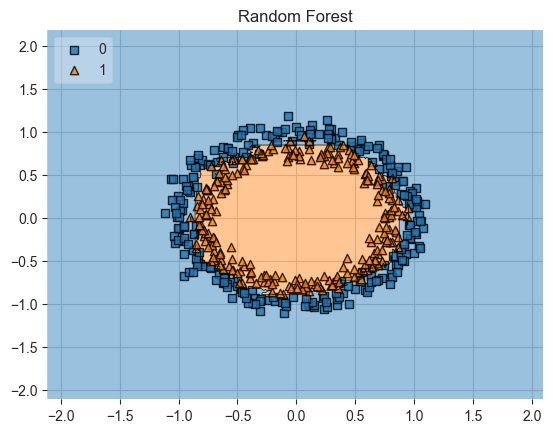

In [177]:
plot_decision_regions(circles_points, circles_labels, clf=rfc, legend=2)
plt.title(f'Random Forest')
plt.show()

Of course, as we test our models on the training data, the tree-based algorithms w/o fixed depth will be overfitted.  
But LogReg, kNN and SVM shows us pretty good results.

#### 2 task - circles and spiral

In [178]:
param_grid = {'C': [0.1, 1, 10], 
             'kernel': ('poly', 'rbf', 'sigmoid'),
             'degree': [2, 3, 4, 5, 6, 7, 8],
             'gamma': ('scale', 'auto')}
clf = GridSearchCV(SVC(tol=1e-5), param_grid, verbose=4, scoring='accuracy')
clf.fit(points, labels)

Fitting 5 folds for each of 126 candidates, totalling 630 fits
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.680 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.605 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.595 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=poly;, score=0.630 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.825 total time=   0.0s
[CV 2/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.815 total time=   0.0s
[CV 3/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.855 total time=   0.0s
[CV 4/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.840 total time=   0.0s
[CV 5/5] END C=0.1, degree=2, gamma=scale, kernel=rbf;, score=0.855 total time=   0.0s
[CV 1/5] END C=0.1, degree=2, gamma=scale, kernel=sigmoid;, sc

[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=rbf;, score=0.855 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.340 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.330 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.345 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.355 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=scale, kernel=sigmoid;, score=0.345 total time=   0.0s
[CV 1/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.625 total time=   0.0s
[CV 2/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.570 total time=   0.0s
[CV 3/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.530 total time=   0.0s
[CV 4/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.575 total time=   0.0s
[CV 5/5] END C=0.1, degree=5, gamma=auto, kernel=poly;, score=0.585 total time=   0.0s
[CV 1/5] END C=0.1, deg

[CV 4/5] END C=0.1, degree=8, gamma=scale, kernel=sigmoid;, score=0.355 total time=   0.0s
[CV 5/5] END C=0.1, degree=8, gamma=scale, kernel=sigmoid;, score=0.345 total time=   0.0s
[CV 1/5] END C=0.1, degree=8, gamma=auto, kernel=poly;, score=0.695 total time=   0.4s
[CV 2/5] END C=0.1, degree=8, gamma=auto, kernel=poly;, score=0.650 total time=   0.2s
[CV 3/5] END C=0.1, degree=8, gamma=auto, kernel=poly;, score=0.615 total time=   2.0s
[CV 4/5] END C=0.1, degree=8, gamma=auto, kernel=poly;, score=0.685 total time=   0.2s
[CV 5/5] END C=0.1, degree=8, gamma=auto, kernel=poly;, score=0.650 total time=   0.3s
[CV 1/5] END C=0.1, degree=8, gamma=auto, kernel=rbf;, score=0.850 total time=   0.0s
[CV 2/5] END C=0.1, degree=8, gamma=auto, kernel=rbf;, score=0.830 total time=   0.0s
[CV 3/5] END C=0.1, degree=8, gamma=auto, kernel=rbf;, score=0.860 total time=   0.0s
[CV 4/5] END C=0.1, degree=8, gamma=auto, kernel=rbf;, score=0.845 total time=   0.0s
[CV 5/5] END C=0.1, degree=8, gamma=aut

[CV 5/5] END C=1, degree=4, gamma=auto, kernel=poly;, score=0.655 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=auto, kernel=rbf;, score=0.935 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=auto, kernel=rbf;, score=0.920 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=auto, kernel=rbf;, score=0.915 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=auto, kernel=rbf;, score=0.915 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=auto, kernel=rbf;, score=0.925 total time=   0.0s
[CV 1/5] END C=1, degree=4, gamma=auto, kernel=sigmoid;, score=0.120 total time=   0.0s
[CV 2/5] END C=1, degree=4, gamma=auto, kernel=sigmoid;, score=0.145 total time=   0.0s
[CV 3/5] END C=1, degree=4, gamma=auto, kernel=sigmoid;, score=0.160 total time=   0.0s
[CV 4/5] END C=1, degree=4, gamma=auto, kernel=sigmoid;, score=0.145 total time=   0.0s
[CV 5/5] END C=1, degree=4, gamma=auto, kernel=sigmoid;, score=0.105 total time=   0.0s
[CV 1/5] END C=1, degree=5, gamma=scale, kernel=poly;, 

[CV 4/5] END C=1, degree=7, gamma=auto, kernel=sigmoid;, score=0.145 total time=   0.0s
[CV 5/5] END C=1, degree=7, gamma=auto, kernel=sigmoid;, score=0.105 total time=   0.0s
[CV 1/5] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.680 total time=   0.0s
[CV 2/5] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.640 total time=   0.0s
[CV 3/5] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.630 total time=   0.2s
[CV 4/5] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.665 total time=   0.0s
[CV 5/5] END C=1, degree=8, gamma=scale, kernel=poly;, score=0.655 total time=   0.0s
[CV 1/5] END C=1, degree=8, gamma=scale, kernel=rbf;, score=0.920 total time=   0.0s
[CV 2/5] END C=1, degree=8, gamma=scale, kernel=rbf;, score=0.905 total time=   0.0s
[CV 3/5] END C=1, degree=8, gamma=scale, kernel=rbf;, score=0.915 total time=   0.0s
[CV 4/5] END C=1, degree=8, gamma=scale, kernel=rbf;, score=0.905 total time=   0.0s
[CV 5/5] END C=1, degree=8, gamma=scale, kernel=rbf;, 

[CV 5/5] END C=10, degree=4, gamma=scale, kernel=poly;, score=0.655 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=scale, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=scale, kernel=rbf;, score=0.910 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=scale, kernel=rbf;, score=0.930 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=scale, kernel=rbf;, score=0.915 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=scale, kernel=rbf;, score=0.935 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamma=scale, kernel=sigmoid;, score=0.080 total time=   0.0s
[CV 2/5] END C=10, degree=4, gamma=scale, kernel=sigmoid;, score=0.085 total time=   0.0s
[CV 3/5] END C=10, degree=4, gamma=scale, kernel=sigmoid;, score=0.095 total time=   0.0s
[CV 4/5] END C=10, degree=4, gamma=scale, kernel=sigmoid;, score=0.110 total time=   0.0s
[CV 5/5] END C=10, degree=4, gamma=scale, kernel=sigmoid;, score=0.085 total time=   0.0s
[CV 1/5] END C=10, degree=4, gamm

[CV 4/5] END C=10, degree=7, gamma=scale, kernel=sigmoid;, score=0.110 total time=   0.0s
[CV 5/5] END C=10, degree=7, gamma=scale, kernel=sigmoid;, score=0.085 total time=   0.0s
[CV 1/5] END C=10, degree=7, gamma=auto, kernel=poly;, score=0.685 total time=  28.5s
[CV 2/5] END C=10, degree=7, gamma=auto, kernel=poly;, score=0.615 total time=  20.2s
[CV 3/5] END C=10, degree=7, gamma=auto, kernel=poly;, score=0.575 total time=  45.0s
[CV 4/5] END C=10, degree=7, gamma=auto, kernel=poly;, score=0.630 total time=  22.2s
[CV 5/5] END C=10, degree=7, gamma=auto, kernel=poly;, score=0.605 total time=  33.2s
[CV 1/5] END C=10, degree=7, gamma=auto, kernel=rbf;, score=0.960 total time=   0.0s
[CV 2/5] END C=10, degree=7, gamma=auto, kernel=rbf;, score=0.900 total time=   0.0s
[CV 3/5] END C=10, degree=7, gamma=auto, kernel=rbf;, score=0.930 total time=   0.0s
[CV 4/5] END C=10, degree=7, gamma=auto, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END C=10, degree=7, gamma=auto, kernel=rb

GridSearchCV(estimator=SVC(tol=1e-05),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4, 5, 6, 7, 8],
                         'gamma': ('scale', 'auto'),
                         'kernel': ('poly', 'rbf', 'sigmoid')},
             scoring='accuracy', verbose=4)

In [179]:
print(clf.best_params_)
print(clf.best_score_)

{'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
0.93


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


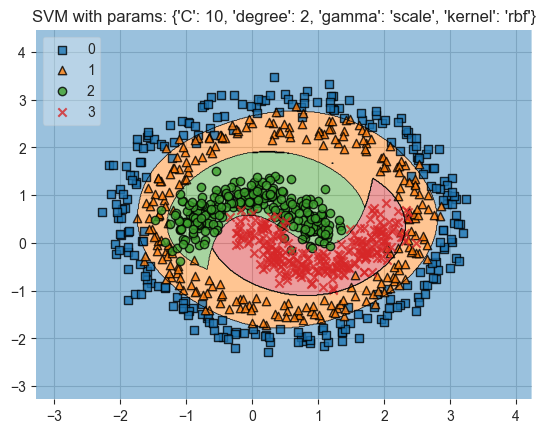

In [180]:
plot_decision_regions(points, labels, clf=clf, legend=2)
plt.title(f'SVM with params: {clf.best_params_}')
plt.show()

In [181]:
clf = LogisticRegression(penalty='l2', tol=1e-5, C=2)

In [185]:
pf = PolynomialFeatures(degree=3, include_bias=False)
X_pf = pf.fit_transform(points, labels)

In [186]:
clf.fit(X_pf, labels)

C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=2, tol=1e-05)

In [187]:
y_pred = clf.predict(X_pf)
print(f'accuracy logreg:{accuracy_score(labels, y_pred)}')

accuracy logreg:0.927


In [188]:
knn = KNeighborsClassifier()

In [192]:
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15], 
             'weights': ('uniform', 'distance'),
             'p': [1, 2, 3, 4, 5]}
clf = GridSearchCV(knn, param_grid, verbose=4, scoring='accuracy')
clf.fit(points, labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END n_neighbors=2, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=uniform;, score=0.880 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=uniform;, score=0.895 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=uniform;, score=0.880 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=uniform;, score=0.860 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=1, weights=distance;, score=0.920 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=1, weights=distance;, score=0.895 total time=   0.0s
[CV 3/5] END n_neighbors=2, p=1, weights=distance;, score=0.905 total time=   0.0s
[CV 4/5] END n_neighbors=2, p=1, weights=distance;, score=0.895 total time=   0.0s
[CV 5/5] END n_neighbors=2, p=1, weights=distance;, score=0.870 total time=   0.0s
[CV 1/5] END n_neighbors=2, p=2, weights=uniform;, score=0.915 total time=   0.0s
[CV 2/5] END n_neighbors=2, p=

[CV 3/5] END n_neighbors=4, p=1, weights=uniform;, score=0.910 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=1, weights=uniform;, score=0.915 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=1, weights=uniform;, score=0.905 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=1, weights=distance;, score=0.930 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END n_neighbors=4, p=1, weights=distance;, score=0.915 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=1, weights=distance;, score=0.925 total time=   0.0s
[CV 5/5] END n_neighbors=4, p=1, weights=distance;, score=0.910 total time=   0.0s
[CV 1/5] END n_neighbors=4, p=2, weights=uniform;, score=0.920 total time=   0.0s
[CV 2/5] END n_neighbors=4, p=2, weights=uniform;, score=0.905 total time=   0.0s
[CV 3/5] END n_neighbors=4, p=2, weights=uniform;, score=0.915 total time=   0.0s
[CV 4/5] END n_neighbors=4, p=2, weights=uniform;, score=0.915 total time=   0.0s
[CV 5/5] EN

[CV 2/5] END n_neighbors=6, p=4, weights=uniform;, score=0.915 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=4, weights=uniform;, score=0.920 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=4, weights=uniform;, score=0.900 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=4, weights=uniform;, score=0.910 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=4, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=4, weights=distance;, score=0.900 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=4, weights=distance;, score=0.935 total time=   0.0s
[CV 4/5] END n_neighbors=6, p=4, weights=distance;, score=0.920 total time=   0.0s
[CV 5/5] END n_neighbors=6, p=4, weights=distance;, score=0.915 total time=   0.0s
[CV 1/5] END n_neighbors=6, p=5, weights=uniform;, score=0.940 total time=   0.0s
[CV 2/5] END n_neighbors=6, p=5, weights=uniform;, score=0.915 total time=   0.0s
[CV 3/5] END n_neighbors=6, p=5, weights=uniform;, score=0.915 total time=   0.0s
[CV 4/5] EN

[CV 1/5] END n_neighbors=9, p=1, weights=uniform;, score=0.930 total time=   0.0s
[CV 2/5] END n_neighbors=9, p=1, weights=uniform;, score=0.895 total time=   0.0s
[CV 3/5] END n_neighbors=9, p=1, weights=uniform;, score=0.920 total time=   0.0s
[CV 4/5] END n_neighbors=9, p=1, weights=uniform;, score=0.930 total time=   0.0s
[CV 5/5] END n_neighbors=9, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END n_neighbors=9, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 2/5] END n_neighbors=9, p=1, weights=distance;, score=0.905 total time=   0.0s
[CV 3/5] END n_neighbors=9, p=1, weights=distance;, score=0.935 total time=   0.0s
[CV 4/5] END n_neighbors=9, p=1, weights=distance;, score=0.920 total time=   0.0s
[CV 5/5] END n_neighbors=9, p=1, weights=distance;, score=0.900 total time=   0.0s
[CV 1/5] END n_neighbors=9, p=2, weights=uniform;, score=0.935 total time=   0.0s
[CV 2/5] END n_neighbors=9, p=2, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/5] EN

[CV 1/5] END n_neighbors=15, p=3, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=3, weights=distance;, score=0.930 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=3, weights=distance;, score=0.935 total time=   0.0s
[CV 4/5] END n_neighbors=15, p=3, weights=distance;, score=0.930 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=3, weights=distance;, score=0.910 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=4, weights=uniform;, score=0.925 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=4, weights=uniform;, score=0.920 total time=   0.0s
[CV 3/5] END n_neighbors=15, p=4, weights=uniform;, score=0.925 total time=   0.0s
[CV 4/5] END n_neighbors=15, p=4, weights=uniform;, score=0.930 total time=   0.0s
[CV 5/5] END n_neighbors=15, p=4, weights=uniform;, score=0.900 total time=   0.0s
[CV 1/5] END n_neighbors=15, p=4, weights=distance;, score=0.945 total time=   0.0s
[CV 2/5] END n_neighbors=15, p=4, weights=distance;, score=0.925 total time=   0.

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15],
                         'p': [1, 2, 3, 4, 5],
                         'weights': ('uniform', 'distance')},
             scoring='accuracy', verbose=4)

In [193]:
print(clf.best_params_)
print(clf.best_score_)

{'n_neighbors': 15, 'p': 3, 'weights': 'distance'}
0.93


C:\Users\kirba\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


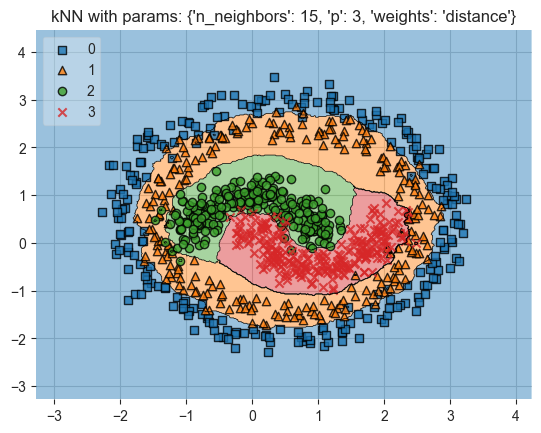

In [194]:
plot_decision_regions(points, labels, clf=clf, legend=2)
plt.title(f'kNN with params: {clf.best_params_}')
plt.show()

GOOD!!!